<a href="https://colab.research.google.com/github/deeksha-punachithaya/XovexIT/blob/master/TensorflowSpeechRecognition%231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install -q kaggle

In [0]:
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-11 13:32:24          51637  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           3528  
praveengovi/coronahack-chest-xraydataset                       CoronaHack -Chest X-Ray-Dataset                       1GB  2020-03-20 01:26:40            375  
katerpillar/meteonet                                           MeteoNet North-West France                           11GB  2020-04-16 08:35:45             11  
andrewmvd/covid19-ct-scans                    

In [5]:
!kaggle competitions download -c tensorflow-speech-recognition-challenge

 99% 2.45G/2.46G [00:49<00:00, 74.5MB/s]
100% 2.46G/2.46G [00:49<00:00, 53.5MB/s]
  0% 0.00/501k [00:00<?, ?B/s]
100% 501k/501k [00:00<00:00, 68.7MB/s]
 99% 1.04G/1.04G [00:23<00:00, 49.6MB/s]
100% 1.04G/1.04G [00:24<00:00, 46.7MB/s]
  0% 0.00/50.0 [00:00<?, ?B/s]
100% 50.0/50.0 [00:00<00:00, 51.2kB/s]


In [6]:
# ! mkdir train
! apt-get install dtrx
! dtrx /content/train.7z

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cabextract cpio debugedit libdw1 liblua5.2-0 libmagic-mgc libmagic1
  libmspack0 librpm8 librpmbuild8 librpmio8 librpmsign8 libunshield0 rpm
  rpm-common rpm2cpio unshield
Suggested packages:
  libarchive1 rpm-i18n file alien elfutils rpmlint rpm2html
The following NEW packages will be installed:
  cabextract cpio debugedit dtrx libdw1 liblua5.2-0 libmagic-mgc libmagic1
  libmspack0 librpm8 librpmbuild8 librpmio8 librpmsign8 libunshield0 rpm
  rpm-common rpm2cpio unshield
0 upgraded, 18 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,264 kB of archives.
After this operation, 9,115 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 cpio amd64 2.12+dfsg-6ubuntu0.18.04.1 [86.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32

In [0]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings

warnings.filterwarnings("ignore")

In [18]:
labels = os.listdir('train/audio')
print(labels, end=' ')

['go', 'marvin', 'eight', 'house', 'nine', 'happy', 'off', 'five', 'bed', 'two', 'bird', 'stop', 'up', 'no', 'sheila', 'right', 'down', 'tree', '_background_noise_', 'left', 'on', 'dog', 'one', 'four', 'three', 'six', 'seven', 'wow', 'yes', 'cat', 'zero'] 

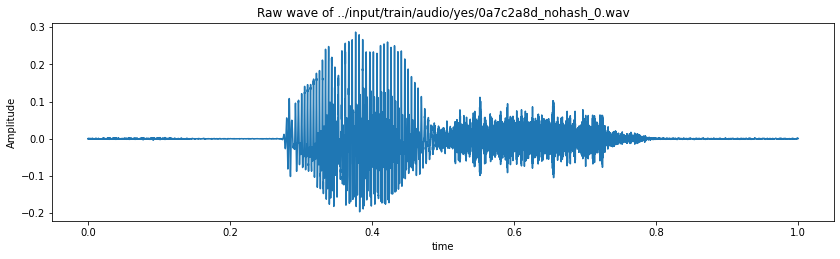

In [19]:
train_audio_path = 'train/audio/'
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [20]:
ipd.Audio(samples, rate=sample_rate)

In [21]:
print(sample_rate)

16000


In [22]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

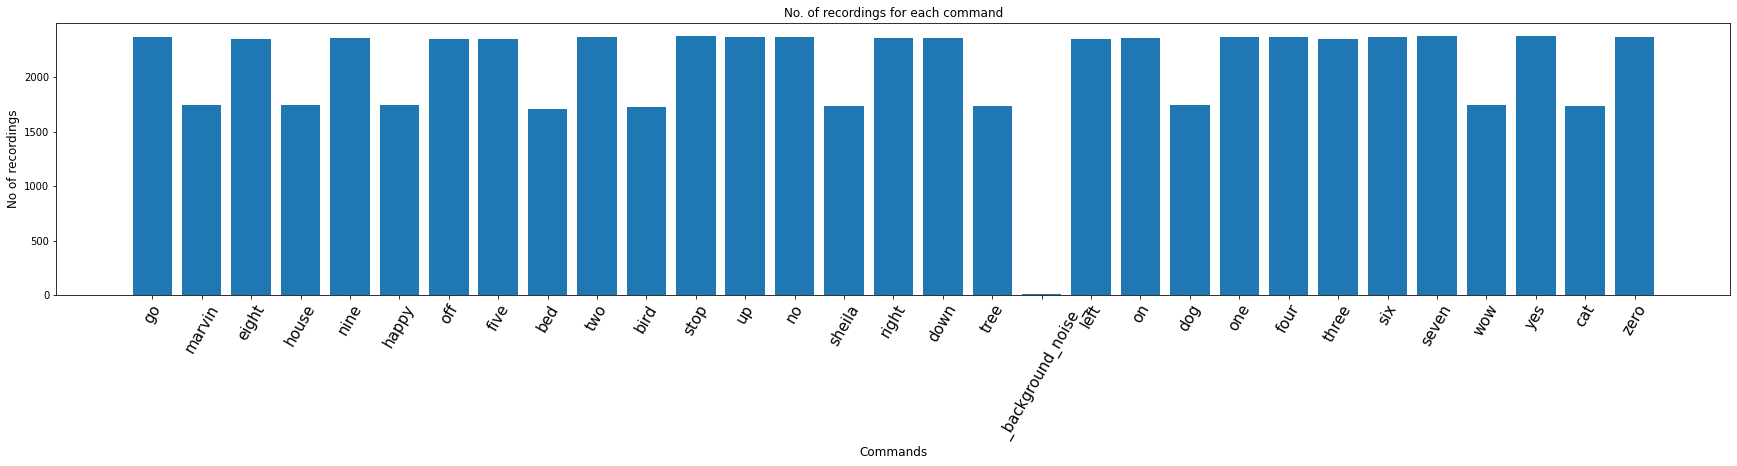

In [23]:
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

(array([6.4721e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.3715625 ,  9.85271875, 19.333875  , 28.81503125, 38.2961875 ,
        47.77734375, 57.2585    , 66.73965625, 76.2208125 , 85.70196875,
        95.183125  ]),
 <a list of 10 Patch objects>)

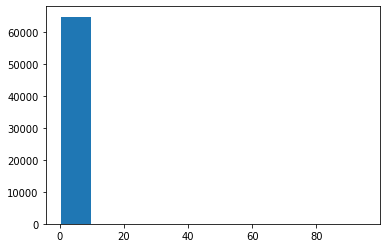

In [24]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [26]:
train_audio_path = 'train/audio/'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

go
marvin
eight
house
nine
happy
off
five
bed
two
bird
stop
up
no
sheila
right
down
tree
_background_noise_
left
on
dog
one
four
three
six
seven
wow
yes
cat
zero


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [28]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

Using TensorFlow backend.


In [0]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [0]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [0]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

In [31]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 884, 16)           0   

In [0]:
inputs = Input(shape=(8000,1))
model = Sequential()
model.add(Conv2D(12, kernel_size=3, input_shape=(40,11,1), activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
model.summary()

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [34]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Train on 46601 samples, validate on 11651 samples
Epoch 1/100
46601/46601 [==============================] - 27s 587us/step - loss: 2.8300 - accuracy: 0.1643 - val_loss: 2.2204 - val_accuracy: 0.3244
Epoch 2/100
46601/46601 [==============================] - 20s 437us/step - loss: 2.0548 - accuracy: 0.3572 - val_loss: 1.7423 - val_accuracy: 0.4588
Epoch 3/100
46601/46601 [==============================] - 20s 438us/step - loss: 1.7392 - accuracy: 0.4545 - val_loss: 1.4356 - val_accuracy: 0.5700
Epoch 4/100
46601/46601 [==============================] - 21s 442us/step - loss: 1.5460 - accuracy: 0.5186 - val_loss: 1.2327 - val_accuracy: 0.6266
Epoch 5/100
46601/46601 [==============================] - 21s 443us/step - loss: 1.4008 - accuracy: 0.5656 - val_loss: 1.1269 - val_accuracy: 0.6701
Epoch 6/100
46601/46601 [==============================] - 21s 440us/step - loss: 1.2946 - accuracy: 0.6005 - val_loss: 1.0280 - val_accuracy: 0.6957
Epoch 7/100
46601/46601 [=========================

In [0]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
from keras.models import load_model
model=load_model('best_model.hdf5')

In [0]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [0]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

In [0]:
print("Text:",predict(samples))

In [0]:
import sounddevice as sd
import soundfile as sf

samplerate = 16000  
duration = 1 # seconds
filename = 'yes.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
    channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)

In [0]:
samples, sample_rate = librosa.load(filepath + '/' + 'stop.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)

In [0]:
predict(samples)